In [120]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Report notebook

In [121]:
import pandas as pd

df = pd.read_csv('datasets/tmdb-15000-movies.csv', lineterminator='\n')

In [122]:
from tmdb15k.datapoints import Genres, Keywords, Popularity, ReleaseDate, VoteAverage, VoteCount

# df = df[df['popularity'] <= 100] # Remove outliers.
# df = df[df['popularity'] <= 50] # Remove outliers.
# df = df[df['vote_count'] >= 100] # These may be too opinionated.
# df = df[df['vote_count'] <= 2000]

# release_date = ReleaseDate(df)
# df = df[release_date.series_year >= 1980] # Remove old movies.

release_date = ReleaseDate(df)
popularity = Popularity(df)
vote_average = VoteAverage(df)
vote_count = VoteCount(df)
genres = Genres(df)
keywords = Keywords(df)

/home/cezar/code/cezarmathe/bigdata-tmdb-1500/tmdb15k/datapoints.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.fillna(0, inplace=True)
/home/cezar/code/cezarmathe/bigdata-tmdb-1500/tmdb15k/ops.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dst] = (df[src] - df[src].min()) / (df[src].max() - df[src].min())
/home/cezar/code/cezarmathe/bigdata-tmdb-1500/tmdb15k/ops.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [123]:
describe_column(vote_average.df, 'vote_average')
describe_column(vote_count.df, 'vote_count')
describe_column(popularity.df, 'popularity')
describe_column(release_date.df, 'release_date')

describe_column(vote_average.df, 'vote_average_z_score')

Column: vote_average
Unique values: [ 6.2  5.8  6.7  7.2  8.   8.1  8.6  7.1  7.6  7.   6.1  7.8  6.   0.
  6.4  5.3  6.5  7.7  6.6  6.9  7.4  7.3  6.8  7.5  4.8  6.3  5.7  5.2
  5.9  4.5  5.5  5.6  4.9  5.1  4.4  4.6  5.4  4.7  3.9 10.   4.1  4.2
  5.   8.2  4.3  2.   8.3  1.9  2.1  7.9  3.5  3.6  3.   3.4  3.8  3.1
  4.   3.3  2.7  8.5  3.7  9.   2.3  8.8  2.8  1.   2.5  9.3  8.4  8.7
  3.2  2.6  9.5  9.8  9.4  1.3  2.4  1.5  1.8  0.5]
Number of unique values: 80
Number of null values: 0
Number of empty values: 0
Number of zero values: 2343
Number of values: 15871
Description: 
count    15871.000000
mean         5.603201
std          2.555917
min          0.000000
25%          5.700000
50%          6.400000
75%          7.100000
max         10.000000
Name: vote_average, dtype: float64
--------------------
Column: vote_count
Unique values: [  54  133   70 ... 3081 5204 2975]
Number of unique values: 3429
Number of null values: 0
Number of empty values: 0
Number of zero values: 2343
Nu

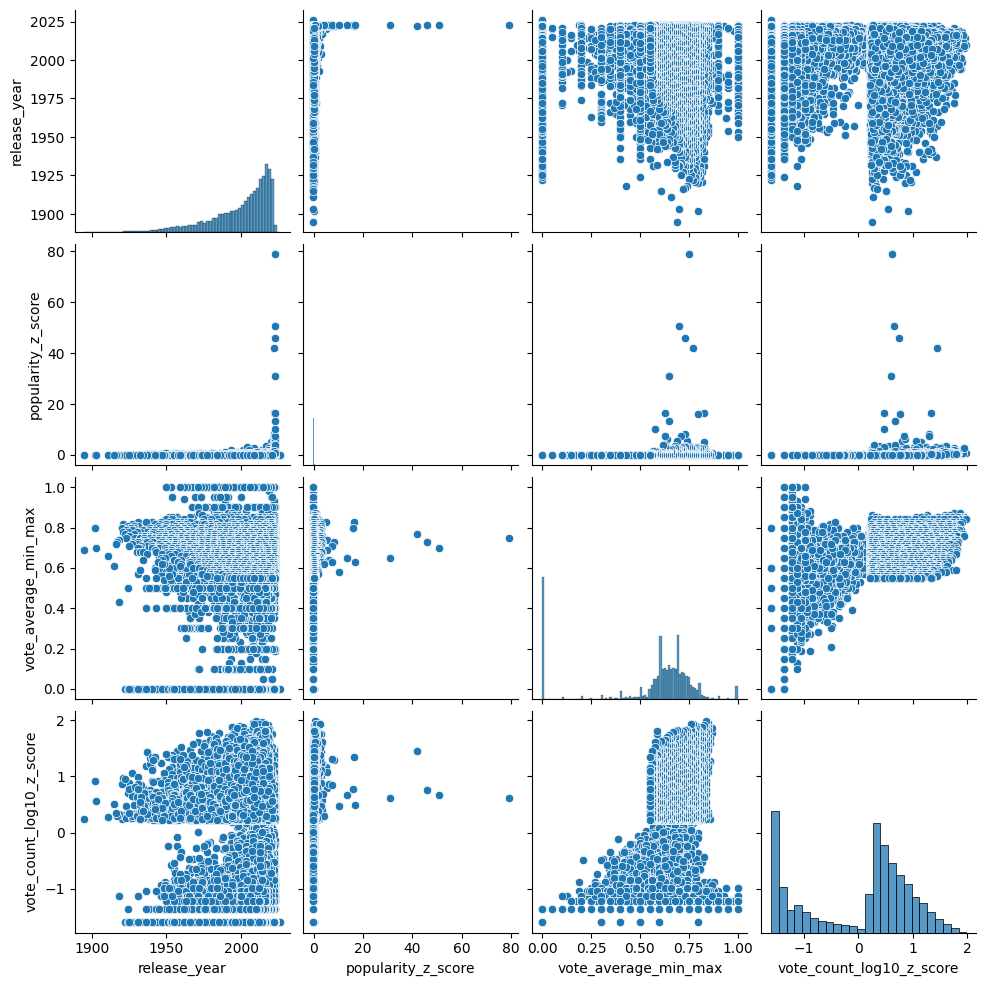

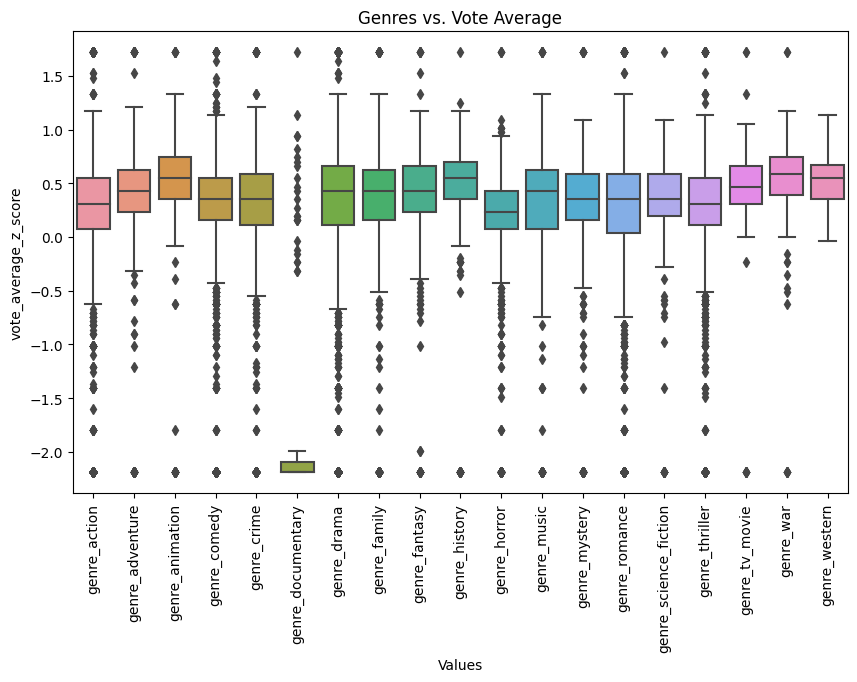

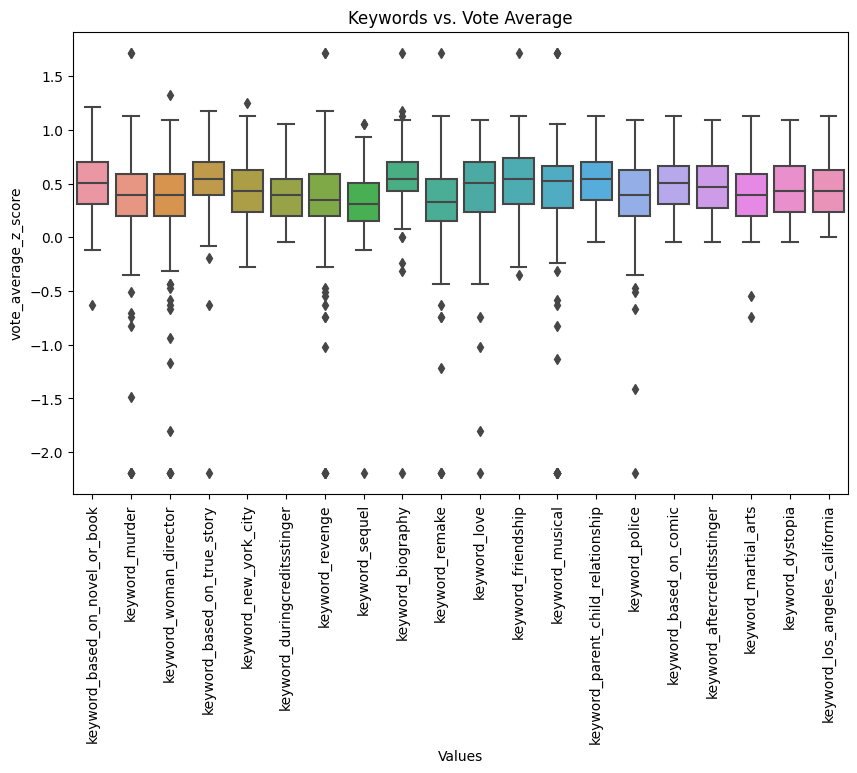

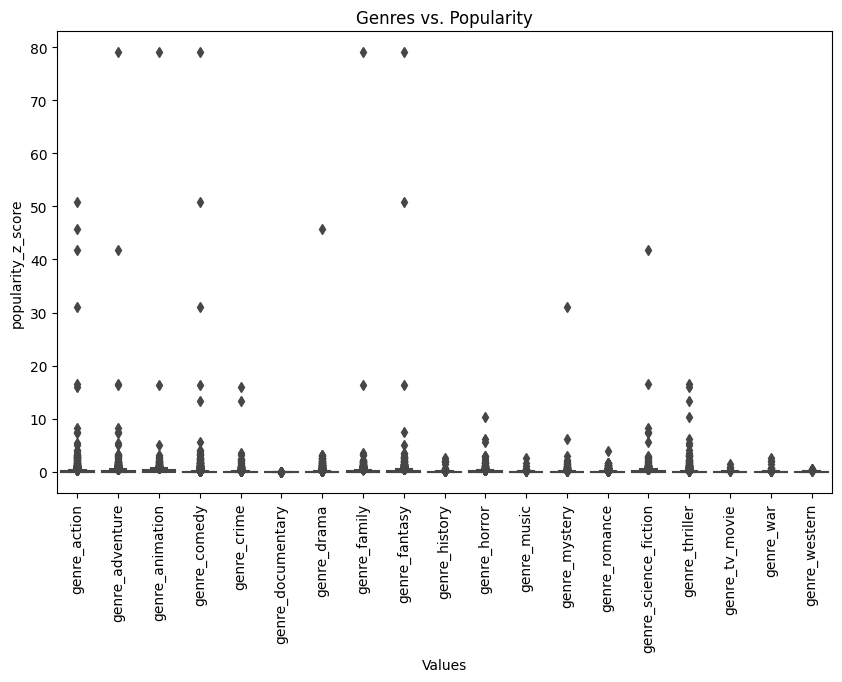

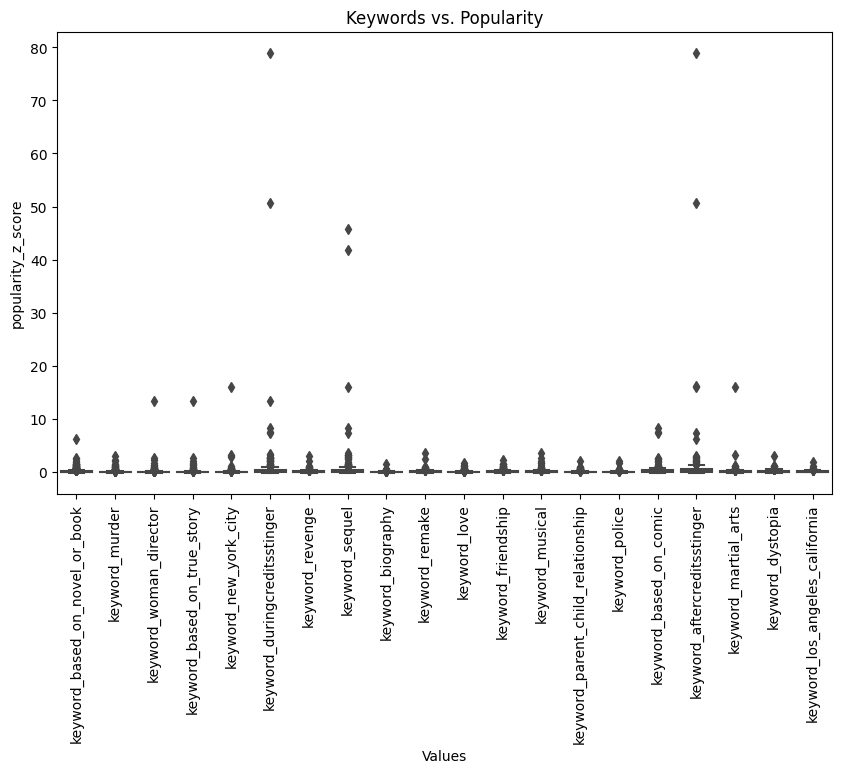

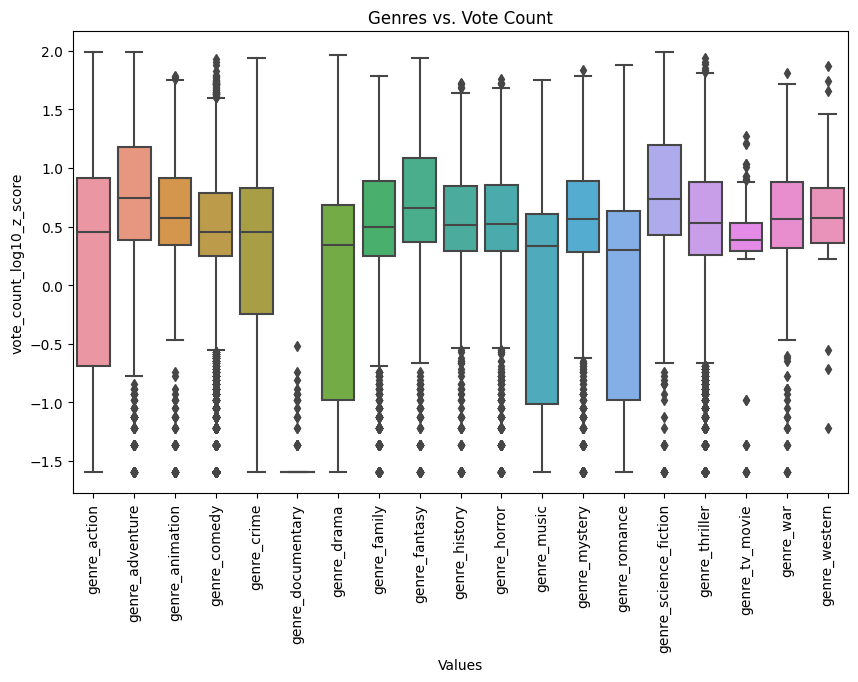

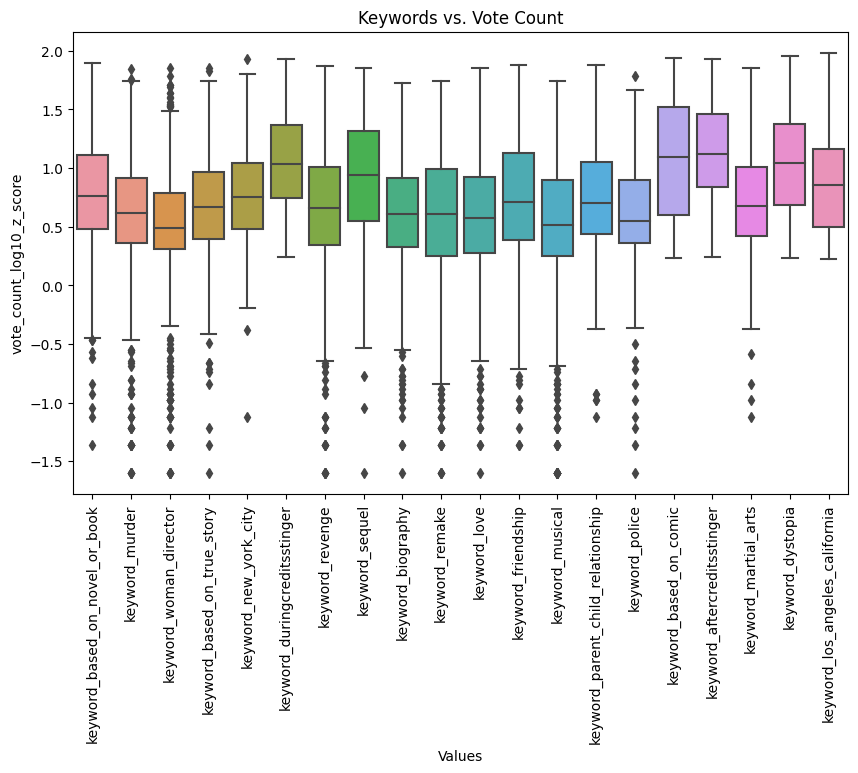

In [124]:
import seaborn as sns

import tmdb15k.plots as plots

# Plot various relationships to see if there are any obvious correlations.
df_pairplot = pd.concat([
    release_date.series_year,
    # popularity.df_min_max,
    popularity.df_z_score,
    vote_average.df_min_max,
    # vote_average.df_z_score,
    # vote_count.df_log10_min_max,
    vote_count.df_log10_z_score,
], axis=1)
sns.pairplot(df_pairplot)

plots.box(vote_average.df_z_score, genres.df, 'Genres vs. Vote Average')
plots.box(vote_average.df_z_score, keywords.df[keywords.columns_top_20], 'Keywords vs. Vote Average')
plots.box(popularity.df_z_score, genres.df, 'Genres vs. Popularity')
plots.box(popularity.df_z_score, keywords.df[keywords.columns_top_20], 'Keywords vs. Popularity')
plots.box(vote_count.df_log10_z_score.sort_values(), genres.df, 'Genres vs. Vote Count')
plots.box(vote_count.df_log10_z_score, keywords.df[keywords.columns_top_20], 'Keywords vs. Vote Count')

===> Summary | Vote average -> Popularity
                          Model      RMSE
3  Gradient Boosting Regression  1.120490
2      Random Forest Regression  1.120666
4                XGB Regression  1.120714
1      Decision Tree Regression  1.120718
0             Linear Regression  1.120793


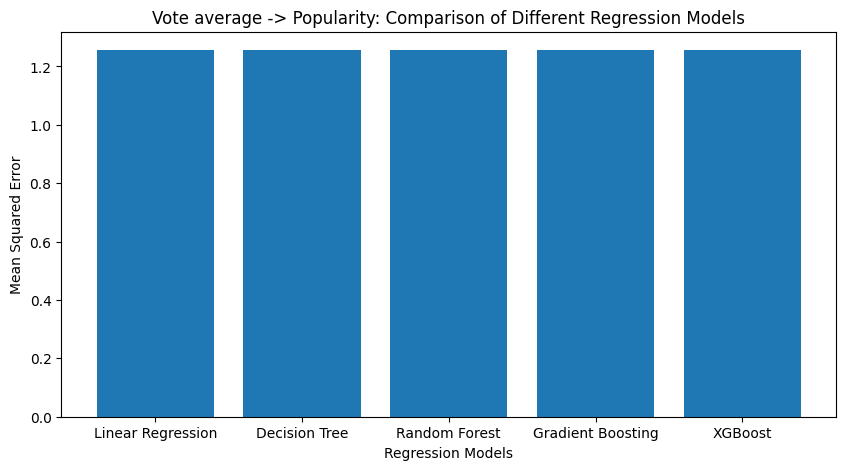

===> Summary | Vote count + Vote average -> Popularity
                          Model      RMSE
0             Linear Regression  1.115485
3  Gradient Boosting Regression  1.140315
2      Random Forest Regression  1.151524
4                XGB Regression  1.170730
1      Decision Tree Regression  1.172940


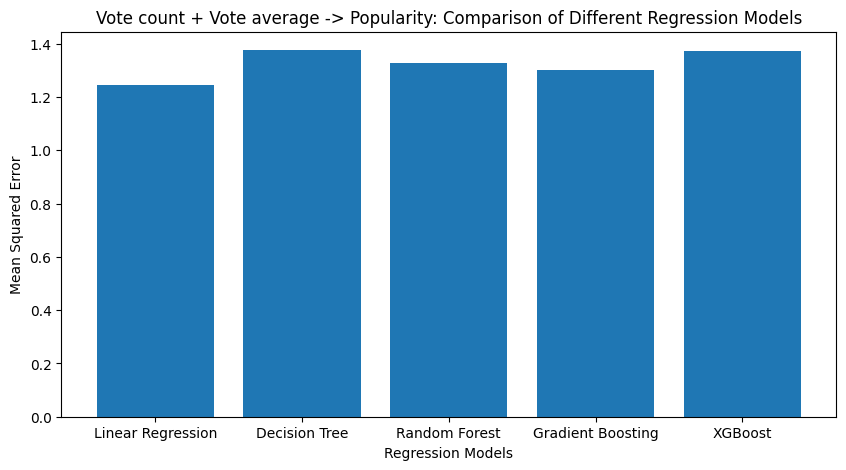

===> Summary | Genres + Keywords + Vote average + Vote count -> Popularity
                          Model      RMSE
0             Linear Regression  1.115250
3  Gradient Boosting Regression  1.158513
1      Decision Tree Regression  1.169271
2      Random Forest Regression  1.171162
4                XGB Regression  1.275667


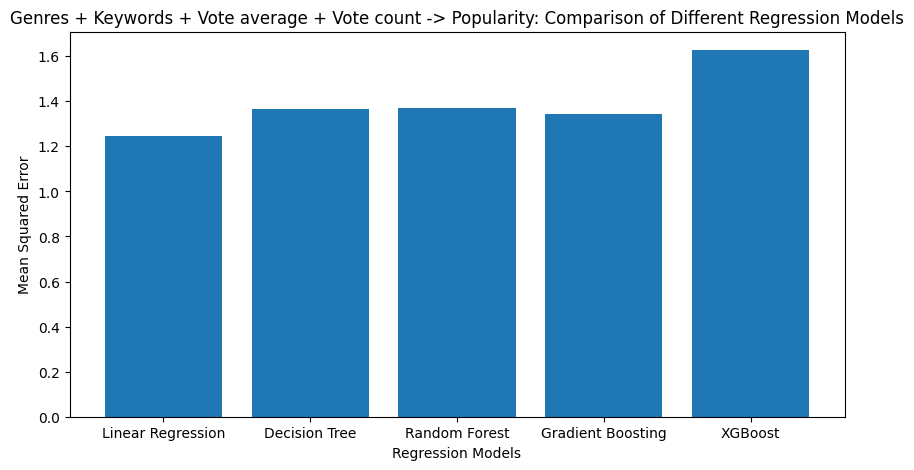

===> Summary | Genres + Keywords + Popularity + Vote count -> Vote average
                          Model      RMSE
3  Gradient Boosting Regression  0.098926
4                XGB Regression  0.104490
2      Random Forest Regression  0.106875
1      Decision Tree Regression  0.133896
0             Linear Regression  0.177730


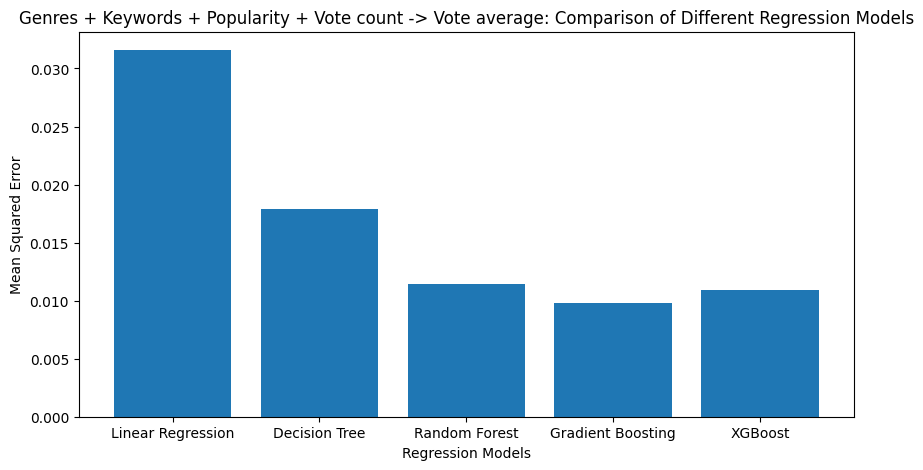

===> Summary | Genres + Keywords + Popularity -> Vote average
                          Model      RMSE
3  Gradient Boosting Regression  0.173075
4                XGB Regression  0.173878
2      Random Forest Regression  0.178651
1      Decision Tree Regression  0.216257
0             Linear Regression  0.223277


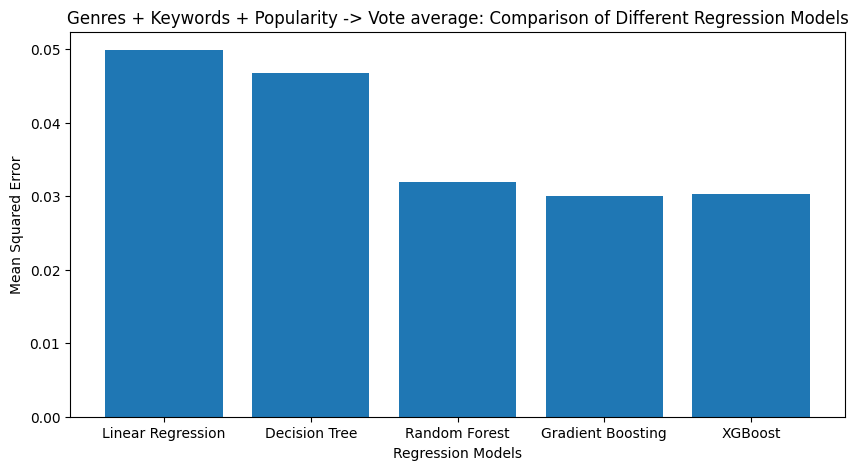

===> Summary | Genres + Keywords + Vote count -> Vote average
                          Model      RMSE
3  Gradient Boosting Regression  0.098853
4                XGB Regression  0.100275
2      Random Forest Regression  0.106891
1      Decision Tree Regression  0.120213
0             Linear Regression  0.177729


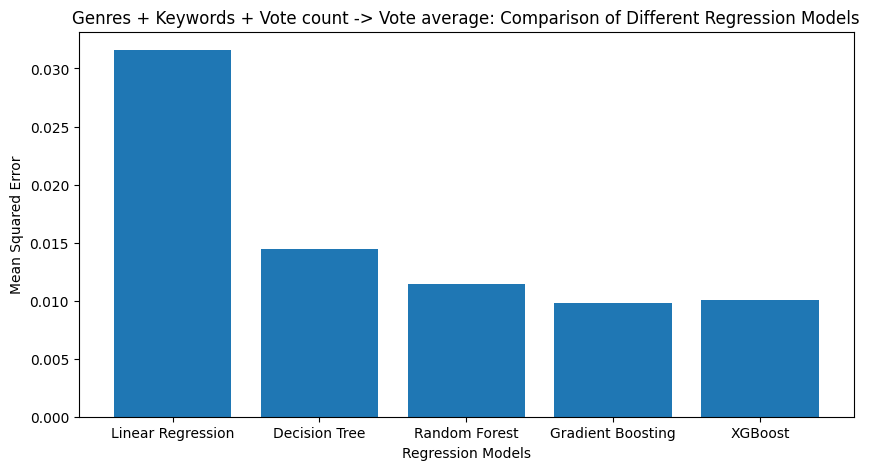

===> Summary | Genres + Keywords -> Vote average
                          Model      RMSE
4                XGB Regression  0.212372
2      Random Forest Regression  0.213308
1      Decision Tree Regression  0.216658
3  Gradient Boosting Regression  0.220337
0             Linear Regression  0.223633


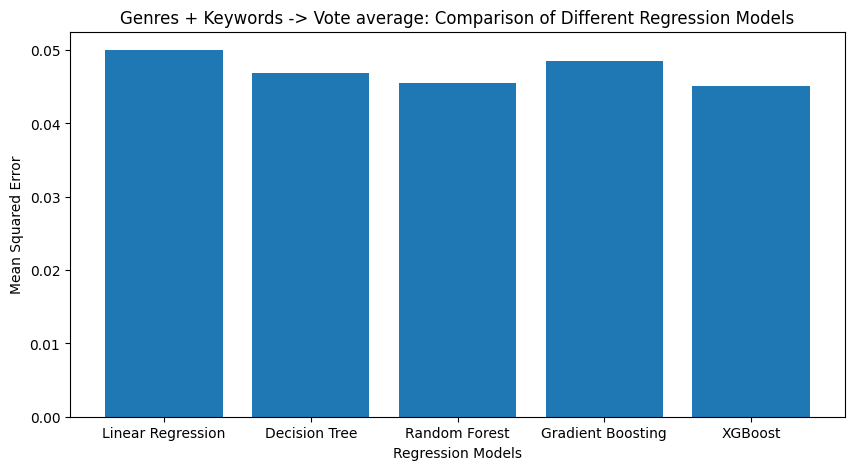

===> Summary | Genres + Keywords -> Popularity
                          Model      RMSE
0             Linear Regression  1.119357
2      Random Forest Regression  1.123059
3  Gradient Boosting Regression  1.143800
4                XGB Regression  1.155326
1      Decision Tree Regression  1.444930


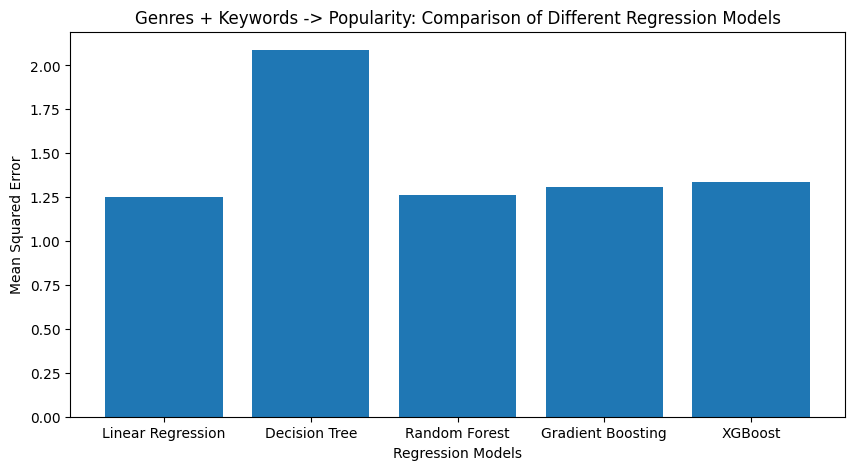

In [125]:
from tmdb15k.workflows import Relationship 

relationships: list[Relationship] = [
    Relationship('Vote average -> Popularity', [vote_average.df_min_max], popularity.df_z_score),
    Relationship('Vote count + Vote average -> Popularity', [vote_count.df_log10_z_score, vote_average.df_min_max], popularity.df_z_score),
    Relationship('Genres + Keywords + Vote average + Vote count -> Popularity', [genres.df, keywords.df[keywords.columns_top_20], vote_average.df_min_max, vote_count.df_log10_z_score], popularity.df_z_score),
    Relationship('Genres + Keywords + Popularity + Vote count -> Vote average', [genres.df, keywords.df[keywords.columns_top_20], popularity.df_z_score, vote_count.df_log10_z_score], vote_average.df_min_max),
    Relationship('Genres + Keywords + Popularity -> Vote average', [genres.df, keywords.df[keywords.columns_top_20], popularity.df_z_score], vote_average.df_min_max),
    Relationship('Genres + Keywords + Vote count -> Vote average', [genres.df, keywords.df[keywords.columns_top_20], vote_count.df_log10_z_score], vote_average.df_min_max),
    Relationship('Genres + Keywords -> Vote average', [genres.df, keywords.df[keywords.columns_top_20]], vote_average.df_min_max),
    Relationship('Genres + Keywords -> Popularity', [genres.df, keywords.df[keywords.columns_top_20]], popularity.df_z_score),
]

for i in relationships:
    i.print_summary()
    i.print_plot()